# Рубежный контроль №2
Работа Брусникиной М.И., группа ИУ5-62Б, вариант 3

### Задача (Кластеризация данных)
Кластеризуйте данные с помощью двух алгоритмов кластеризации. Сравните качество кластеризации с помощью следующих метрик качества кластеризации (если это возможно для Вашего набора данных):
- Adjusted Rand index
- Adjusted Mutual Information
- Homogeneity, completeness, V-measure
- Коэффициент силуэта

Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.

Требование для студентов группы ИУ5-62Б - использовать MeanShift и иерархическую кластеризацию.

Датасет №3 - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
wine = load_wine()
for x in wine:
    print(x)

data
target
target_names
DESCR
feature_names


In [3]:
# Признаки
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
# Метки
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
# Имена меток
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [6]:
# Разделение набора данных
x_axis = wine.data[:, 5]  
y_axis = wine.data[:, 9] 

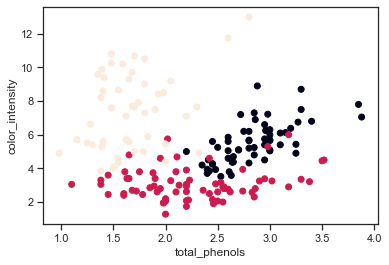

In [7]:
# Построение
plt.xlabel(wine.feature_names[5])
plt.ylabel(wine.feature_names[9])
plt.scatter(x_axis, y_axis, c=wine.target)
plt.show()

In [8]:
data = pd.DataFrame(data= np.c_[wine.data[:, 5], wine.data[:, 9]],
                     columns= ['total_phenols', 'color_intensity'])

In [9]:
data.head()

,total_phenols,color_intensity
0,2.80,5.64
1,2.65,4.38
2,2.80,5.68
3,3.85,7.80
4,2.80,4.32


In [10]:
data.shape

(178, 2)

In [11]:
def do_clustering(cluster_dataset, method):
    """
    Выполнение кластеризации для данных примера
    """
    temp_cluster = method.fit_predict(cluster_dataset)    
    return temp_cluster

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def claster_metrics(method, data, true_y):
    """
    Вычисление метрик кластеризации
    """
    result_Method = do_clustering(data, method)
    
    list = []
    list.append(adjusted_rand_score(true_y, result_Method))
    list.append(adjusted_mutual_info_score(true_y, result_Method))
    h, c, v = homogeneity_completeness_v_measure(true_y, result_Method)
    list.append(h)
    list.append(c)
    list.append(v)
    list.append(silhouette_score(data, result_Method))
    
    names = ['ARI', 'AMI', 'Homogeneity', 'Completeness', 'V-measure', 'Silhouette']
    for i in range(0,6):
        print('{}: {};'.format(names[i], list[i]))

### MeanShift

In [13]:
result_MeanShift = do_clustering(data, MeanShift())

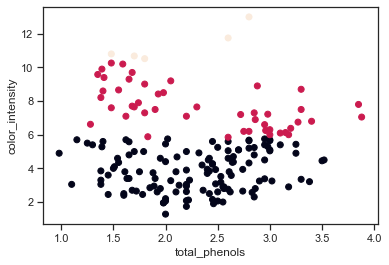

In [14]:
# Построение
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c=result_MeanShift)
plt.show()

### Иерархическая кластеризация

In [15]:
result_AgglomerativeClustering = do_clustering(data, AgglomerativeClustering(n_clusters=3))

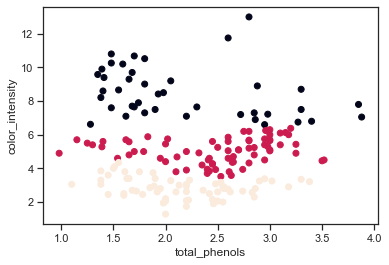

In [16]:
# Построение
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c=result_AgglomerativeClustering)
plt.show()

In [17]:
result_AgglomerativeClustering = do_clustering(data, AgglomerativeClustering())

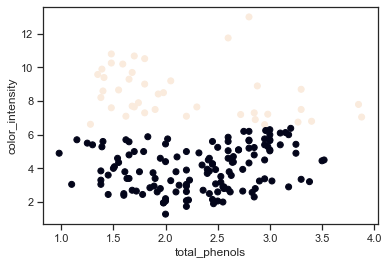

In [18]:
# Построение
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c=result_AgglomerativeClustering)
plt.show()

### Сравнение качества кластеризации

In [19]:
claster_metrics(MeanShift(), data, wine.target)

ARI: 0.18489049424576762;
AMI: 0.20971343652886495;
Homogeneity: 0.18127363808614247;
Completeness: 0.28264533876567177;
V-measure: 0.22088403968225448;
Silhouette: 0.48025624492483165;


In [20]:
claster_metrics(AgglomerativeClustering(n_clusters=3), data, wine.target)

ARI: 0.44829010373340333;
AMI: 0.44489848145061245;
Homogeneity: 0.4475962520065619;
Completeness: 0.4540128430783018;
V-measure: 0.4507817146755018;
Silhouette: 0.4540352632517793;


Таким образом, для данного датасета иерархическая кластеризация оказалась более качественной по сравнению с MeanShift.